# Business Problem

**Context**

California Housing Price merupakan dataset yang berisi informasi mengenai harga rumah di California. Rumah merupakan aset yang sangat berharga dikarenakan rumah selain berfungsi sebagai tempat tinggal akan tetapi dapat menjadi suatu investasi yang dimiliki seseorang. Harga rumah dipengaruhi oleh berbagai faktor seperti lokasi, ukuran serta fasilitas yang ditawarkan. Menjual dan membeli rumah merupakan suatu keputusan finansial yang kompleks di mana penjual rumah perlu menentukan harga jual yang sesuai agar mendapatkan pembeli secepatnya dengan mendapatkan keuntungan yang besar dan sebaliknya pembeli rumah juga perlu mendapatkan nilai yang sesuai dengan uang yang dikeluarkan.

**Problem Statement**

Stakeholder : Agen Properti Rumah California

Di California, pasar perumahannya dikenal memiliki fluktuasi harga yang signifikan serta permintaannya juga tinggi. Dalam menentukan harga jual rumah yang tepat khususnya di California menjadi tantangan besar bagi para agen properti di mana harga yang terlalu tinggi dapat membuat agen properti mendapatkan keuntungan yang maksimal tetapi jika terlalu mahal maka akan sulit untuk mendapatkan pembeli sehingga agen properti harus cukup bijak untuk menentukan harga sehingga harga tersebut dapat menarik pembeli potensial. Oleh karena itu dibutuhkan alat yang dapat memprediksi harga rumah berdasarkan fitur yang ada dalam dataset California Housing Price.

**Goals**

Berdasarkan problem statement, agen properti memerlukan alat yang dapat memprediksi harga rumah berdasarkan fitur yang ada di dalam dataset California Housing Price. Alat ini diharapkan dapat membantu agen properti dalam menentukan harga yang kompetitif yang sesuai dengan fitur yang didapatkan oleh pembeli serta pembeli juga dapat terbantu dengan menilai apakah harga yang diberikan sudah sesuai dengan nilai properti.

**Analytic Approach**

Untuk membuat alat prediktif harga rumah di California maka kita akan melakukan analisis data dari fitur-fitur yang tersedia untuk mengetahui pembeda antara satu properti dengan yang lainnya. Oleh karena itu yang dilakukan adalah:
- Exploratory Data Analysis (EDA) : Untuk memahami distribusi serta hubungan antara berbagai fitur.
- Data Preprocessing : Mengidentifikasi nilai yang kosong, outlier atau data yang tidak sesuai untuk menciptakan prediksi yang lebih akurat pada alat prediktif.
- Feature Engineering : Menciptakan fitur baru yang dapat meningkatkan akurasi model.
- Modelling Machine Learning : Membangun model-model regresi dan memilih model yang terbaik.
- Model Evaluation : Mengevaluasi model menggunakan metrik.

Metrik sendiri terdiri atas:
- Root Mean Squared Error (RMSE) adalah metrik yang sangat umum digunakan untuk mengukur kinerja model regresi. RMSE memberikan estimasi seberapa jauh, rata-rata, prediksi dari model berada dari nilai sebenarnya.
- Mean Absolute Error (MAE) untuk menghitung rata-rata selisih absolut antara nilai yang diprediksi oleh model dengan nilai aktual.
- Mean Absolute Percentage Error (MAPE) untuk mengukur rata-rata persentase kesalahan prediksi relatif terhadap nilai aktual.

# Data Understanding

- California Housing Price merupakan data mengenai rumah yang berada di California yang di dapatkan dari data sensus pada tahun 1990.
- Setiap data dalam dataset menginformasikan terkait perumahan dan populasi perumahan

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| longitude | float64 | Ukuran seberapa jauh ke barat pada sebuah rumah. |
| latitude | float64 | Ukuran seberapa jauh ke utara pada sebuah rumah. |
| housing_median_age | float64 | Usia median rumah dalam sebuah blok. |
| total_rooms | float64 | Jumlah total kamar dalam sebuah blok. |
| total_bedrooms | float64 | Jumlah total kamar tidur dalam sebuah blok. |
| population | float64 | Jumlah orang yang tinggal dalam sebuah blok. |
| households | float64 | Jumlah total rumah tangga (kelompok orang yang tinggal dalam satu unit rumah) dalam sebuah blok. |
| median_income | float64 | Pendapatan median untuk rumah tangga dalam satu blok rumah (diukur dalam puluhan ribu Dolar AS). |
| ocean_proximity | object | Lokasi rumah terhadap laut/samudra. |
| median_house_value | float64 | Nilai median harga rumah untuk rumah tangga dalam sebuah blok (diukur dalam Dolar AS). |

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, f1_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.feature_selection import SelectPercentile, SelectKBest,f_regression

from sklearn.pipeline import Pipeline, FeatureUnion


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import SimpleImputer, KNNImputer

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

In [2]:
# Menampilkan data California Housing Price
df=pd.read_csv('data_california_house.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [3]:
df['ocean_proximity'].unique()

array(['INLAND', 'NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [4]:
df['ocean_proximity_map'] = np.where(df['ocean_proximity'] == 'INLAND', 1,
                        np.where(df['ocean_proximity'] == 'NEAR BAY', 2,
                        np.where(df['ocean_proximity'] == '<1H OCEAN', 3,
                        np.where(df['ocean_proximity'] == 'NEAR OCEAN', 4,
                                                5))))
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,ocean_proximity_map
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0,1
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,2
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,3
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,3
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,1
...,...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0,1
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0,1
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0,4
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0,3


# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) adalah langkah yang penting dalam memahami karakteristik data sebelum melakukan pemodelan.

#### Data Distribution

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity_map'}>, <Axes: >,
        <Axes: >]], dtype=object)

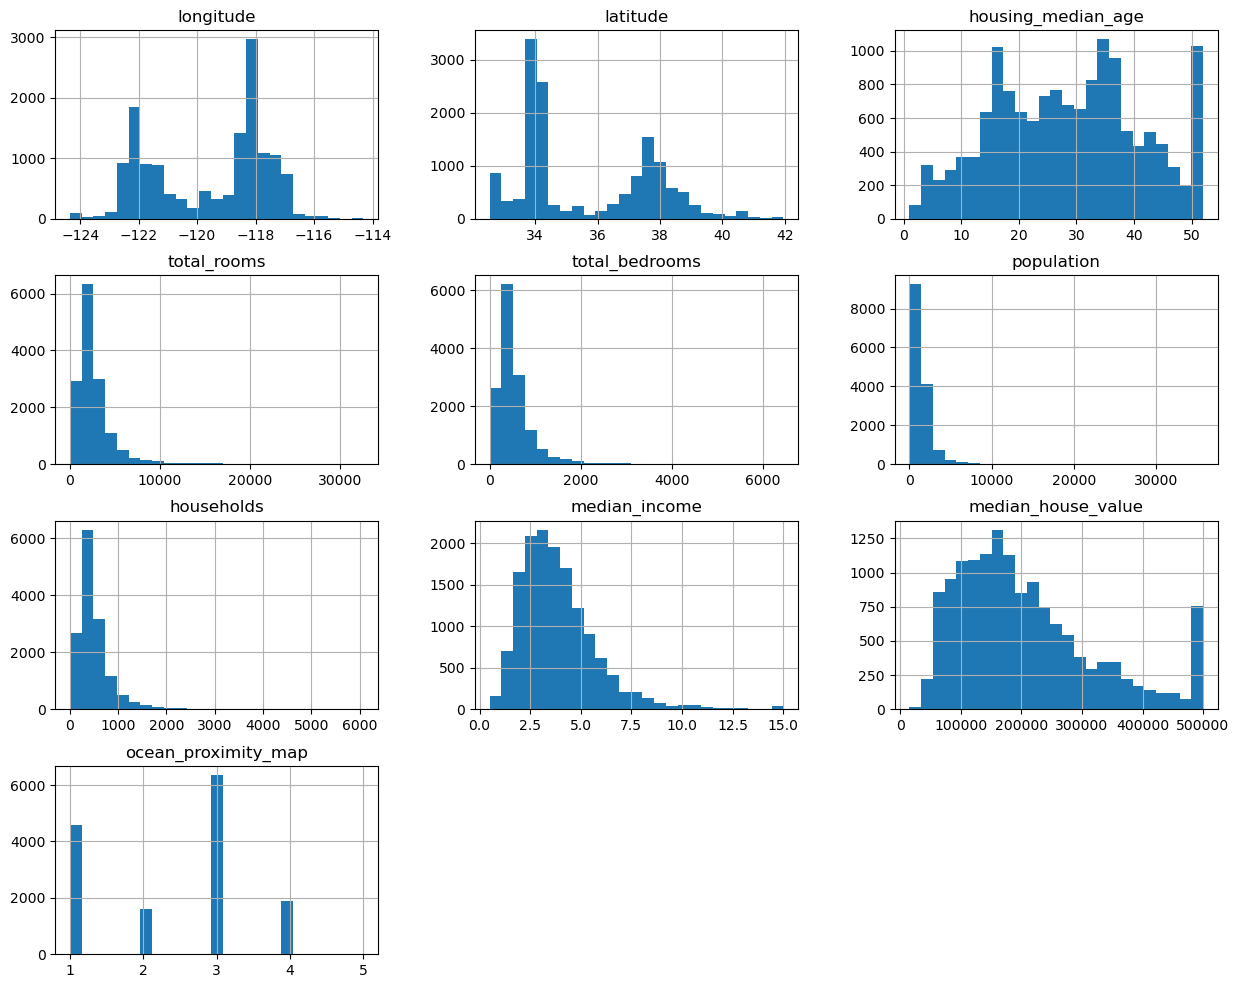

In [5]:
df.hist(bins=25,figsize=(15,12))

Berdasarkan histogram di atas dapat terlihat bahwa distribusi data pada setiap kolom merupakan berdistribusi tidak normal. Selain itu dapat dilihat dari histogram bahwa terdapat outlier pada kolom housing_median_age dan median_house_value.

#### Location

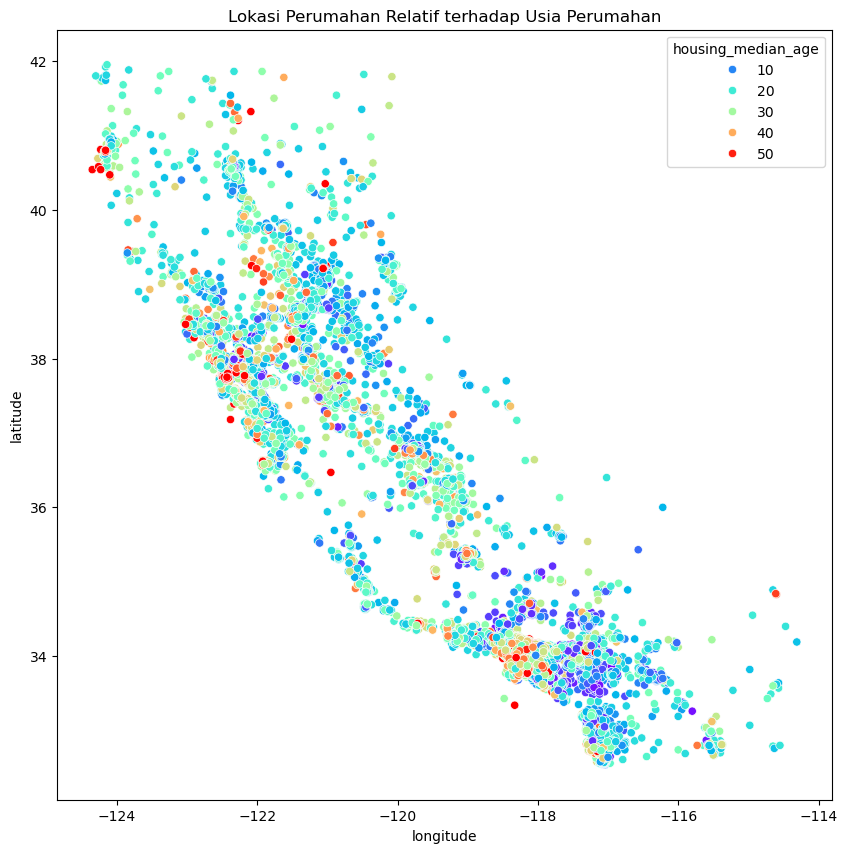

In [6]:
# Plot lokasi perumahan relatif terhadap usia perumahan
plt.figure(figsize=(10, 10))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['housing_median_age'], palette='rainbow').set_title('Lokasi Perumahan Relatif terhadap Usia Perumahan')
plt.show()

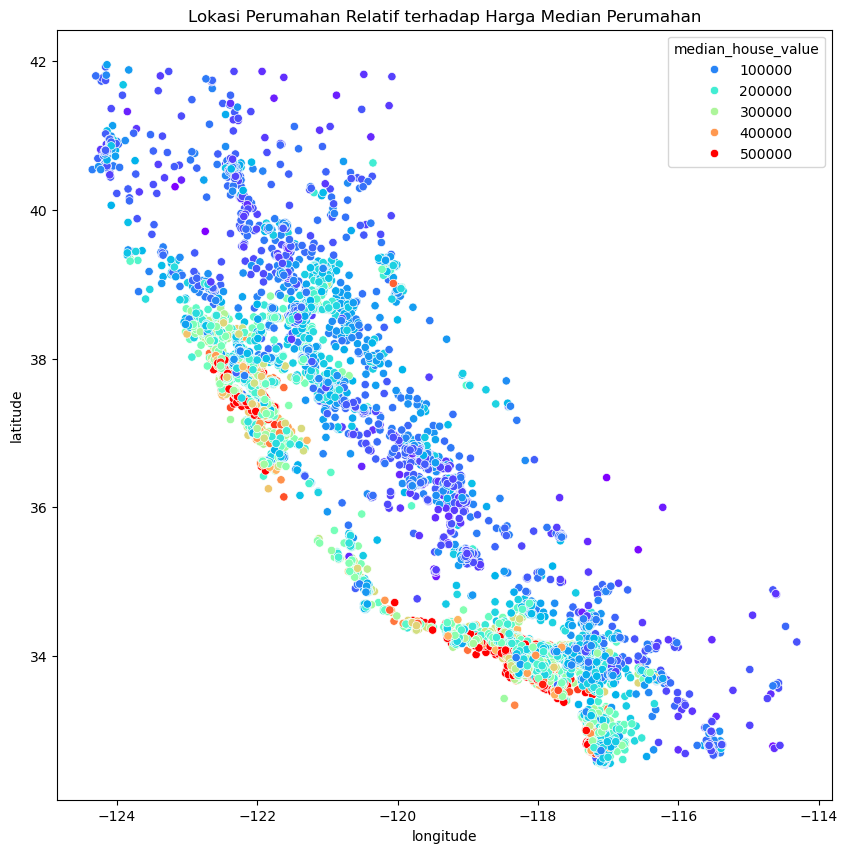

In [7]:
# Plot lokasi perumahan relatif terhadap harga median perumahan
plt.figure(figsize=(10, 10))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['median_house_value'], palette='rainbow').set_title('Lokasi Perumahan Relatif terhadap Harga Median Perumahan')
plt.show()

#### Correlation

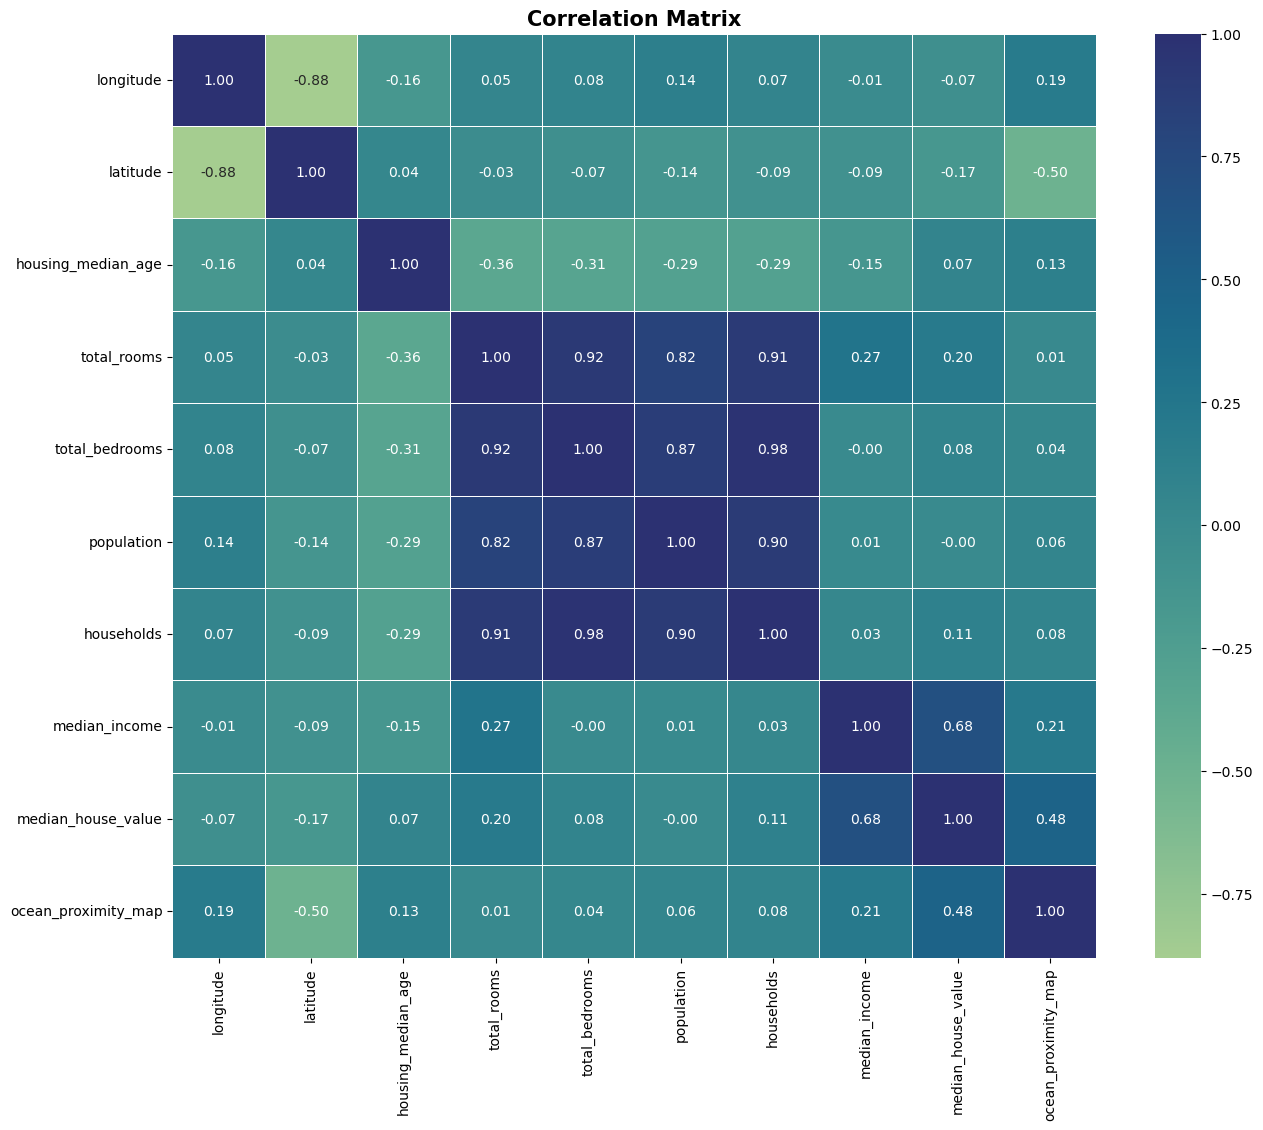

In [8]:
# Pilih hanya kolom-kolom numerik
numeric_df = df.select_dtypes(include=[float, int])

# Hitung korelasi menggunakan metode Spearman
corr = numeric_df.corr(method='spearman')

# Plot heatmap korelasi
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='crest', square=True, linewidths=.5, annot_kws={"size": 10})
plt.title('Correlation Matrix', size=15, weight='bold')
plt.show()

# Data Cleaning

#### Handling Data Entry Errors

Pada bagian ini kita perlu mengecek apakah terdapat nilai nilai pada suatu kolom yang tidak masuk akal seperti nilai yang negatif. Oleh karena itu perlu mengecek pada statistik deskriptif pada setiap numerikal fitur.

In [9]:
# Menampilkan statistik deskriptif dari masing masing kolom dataset California Housing Price
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_map
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516,2.384621
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182,1.063553
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000,1.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000,3.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000,3.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000


In [10]:
# Pengecekan apakah ada data dari total_rooms yang lebih besar dari total_bedrooms
pd.DataFrame(df[df['total_rooms']<df['total_bedrooms']].value_counts())

,,,,,,,,,,,count
longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,ocean_proximity_map,


Jika dilihat dari statistik deskriptifnya terlihat tidak ada kesalahan penginputan data yang error seperti nilai negatif pada kolom yang seharusnya tidak diisi dengan nilai negatif. Nilai negatif hanya terdapat pada kolom longitude dan latitude dan hal tersebut bukan suatu masalah. Selain itu juga telah dilakukan pengecekan terhadap kolom total_rooms dan kolom total_bedrooms di mana seharusnya total_bedrooms tidak mungkin jumlahnya melebihi total_rooms.

#### Handling Missing Value

Pada bagian ini kita perlu mengecek apakah terdapat missing value pada kolom yang tersedia. Jika ada maka perlu untuk kita pertimbangkan untuk mengisinya dengan mean / median / modus atau di drop missing value.

In [11]:
# Menampilkan jumlah missing value di setiap kolom
df.isna().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms         137
population               0
households               0
median_income            0
ocean_proximity          0
median_house_value       0
ocean_proximity_map      0
dtype: int64

In [12]:
# Menampilkan persentase missing value di setiap kolom
round(df.isna().sum()/len(df)*100).astype(str)+' %'

longitude              0.0 %
latitude               0.0 %
housing_median_age     0.0 %
total_rooms            0.0 %
total_bedrooms         1.0 %
population             0.0 %
households             0.0 %
median_income          0.0 %
ocean_proximity        0.0 %
median_house_value     0.0 %
ocean_proximity_map    0.0 %
dtype: object

Missing value terdapat pada kolom `total_bedrooms` sebesar 1.0% dan pada missing value ini akan diisi dengan menggunakan mean / median tergantung berdasarkan distribusi datanya apabila distribusi datanya terdistribusi normal maka akan diisi dengan menggunakan mean sedangkan apabila tidak terdistribusi normal maka akan diisi menggunakan median.

In [13]:
# Menampilkan missing value yang terdapat pada kolom 'total_bedrooms'
df[df['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,ocean_proximity_map
88,-121.47,38.61,31.0,1072.0,NaN,781.0,281.0,1.6563,INLAND,65800.0,1
119,-117.28,34.26,18.0,3895.0,NaN,1086.0,375.0,3.3672,INLAND,133600.0,1
251,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,INLAND,158700.0,1
340,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,146500.0,3
410,-122.42,40.44,16.0,994.0,NaN,495.0,181.0,2.1875,INLAND,76400.0,1
...,...,...,...,...,...,...,...,...,...,...,...
13856,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN,150400.0,3
13932,-117.87,33.83,27.0,2287.0,NaN,1140.0,351.0,5.6163,<1H OCEAN,231000.0,3
13989,-118.40,34.17,24.0,6347.0,NaN,2945.0,1492.0,3.3545,<1H OCEAN,221500.0,3
14308,-118.55,34.19,18.0,5862.0,NaN,3161.0,1280.0,3.1106,<1H OCEAN,170600.0,3


In [14]:
# Mengidentifikasi distribusi data pada setiap kolom
from scipy.stats import shapiro

# Mengambil hanya kolom numerik
numerical = df.select_dtypes(include='number')

for i in numerical.columns:
    stats, p_val = shapiro(numerical[i])
    if p_val >= 0.05:
        print(f"{i} data terdistribusi normal")
    else:
        print(f"{i} data tidak terdistribusi normal")

longitude data tidak terdistribusi normal
latitude data tidak terdistribusi normal
housing_median_age data tidak terdistribusi normal
total_rooms data tidak terdistribusi normal
total_bedrooms data tidak terdistribusi normal
population data tidak terdistribusi normal
households data tidak terdistribusi normal
median_income data tidak terdistribusi normal
median_house_value data tidak terdistribusi normal
ocean_proximity_map data tidak terdistribusi normal


C:\Users\user\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14448.
  res = hypotest_fun_out(*samples, **kwds)


Pada kolom `total_bedrooms` ketika dicek distribusi datanya menggunakan metode uji shapiro wilk terlihat bahwa kolom tersebut tidak terdistribusi normal maka missing value akan diisi dengan menggunakan mediannya.

In [15]:
# Mengisi missing value pada kolom total_bedrooms dengan nilai median pada kolom total_bedrooms
df['total_bedrooms'] = round(df['total_bedrooms'].fillna(df['total_bedrooms'].median()), 0)

In [16]:
# Mengecek jumlah missing value pada dataset
df.isna().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms         0
population             0
households             0
median_income          0
ocean_proximity        0
median_house_value     0
ocean_proximity_map    0
dtype: int64

#### Handling Outlier

Pada bagian ini kita akan mengecek apakah ada outlier pada setiap kolom dikarenakan jika masih ada outlier maka dapat mempengaruhi model machine learning.

In [17]:
# Menampilkan info tipe data setiap kolom California Housing Price
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            14448 non-null  float64
 1   latitude             14448 non-null  float64
 2   housing_median_age   14448 non-null  float64
 3   total_rooms          14448 non-null  float64
 4   total_bedrooms       14448 non-null  float64
 5   population           14448 non-null  float64
 6   households           14448 non-null  float64
 7   median_income        14448 non-null  float64
 8   ocean_proximity      14448 non-null  object 
 9   median_house_value   14448 non-null  float64
 10  ocean_proximity_map  14448 non-null  int32  
dtypes: float64(9), int32(1), object(1)
memory usage: 1.2+ MB


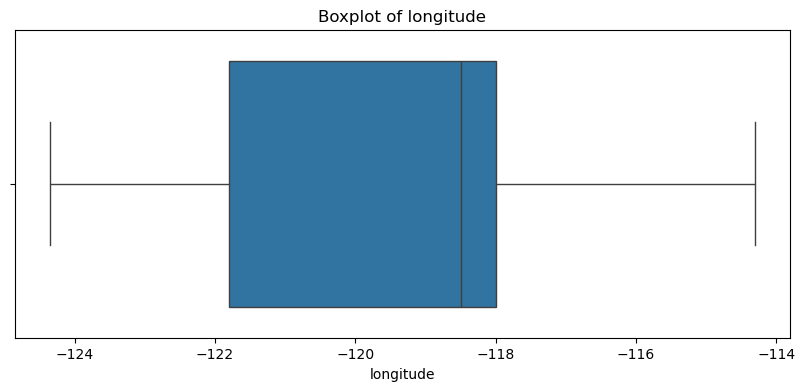

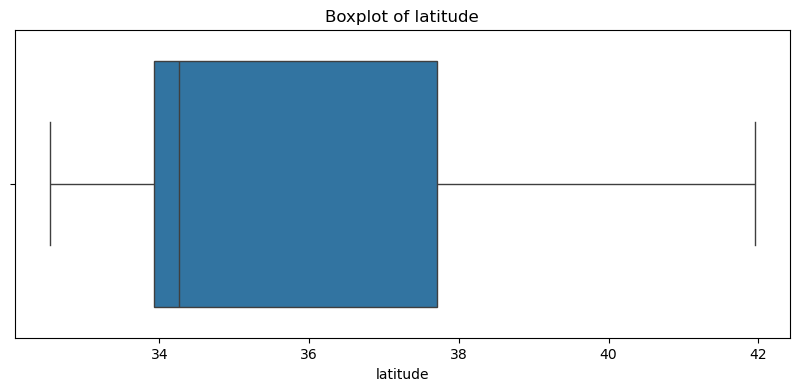

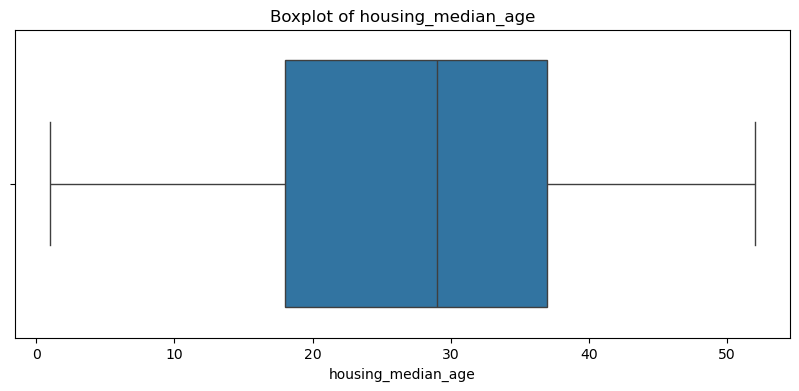

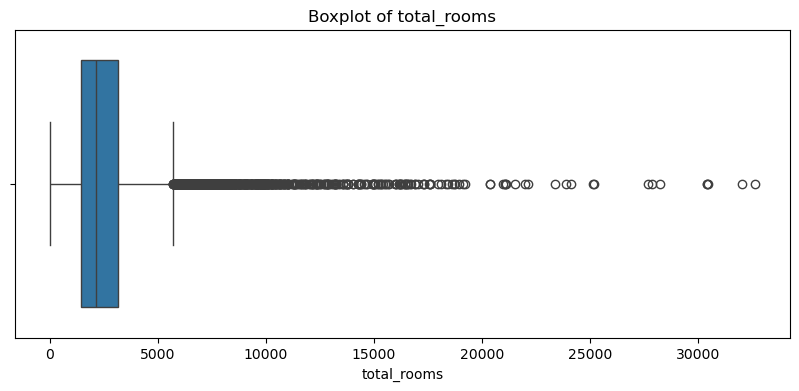

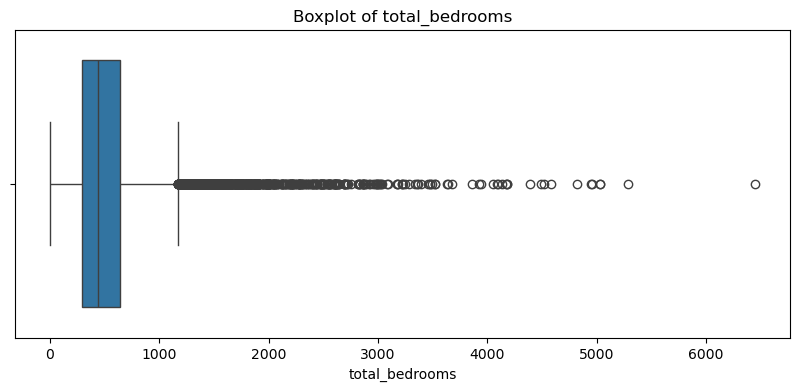

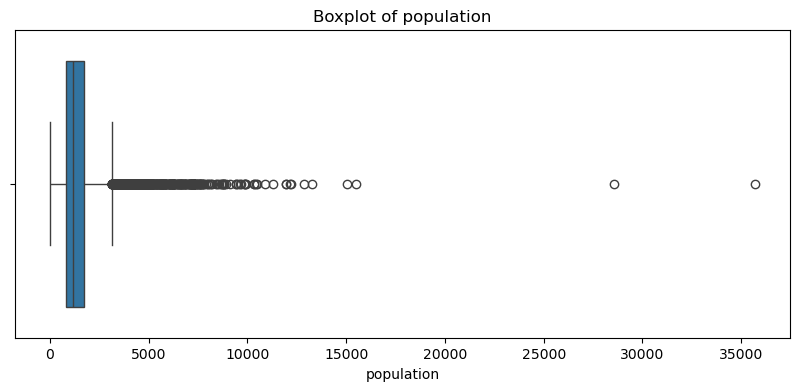

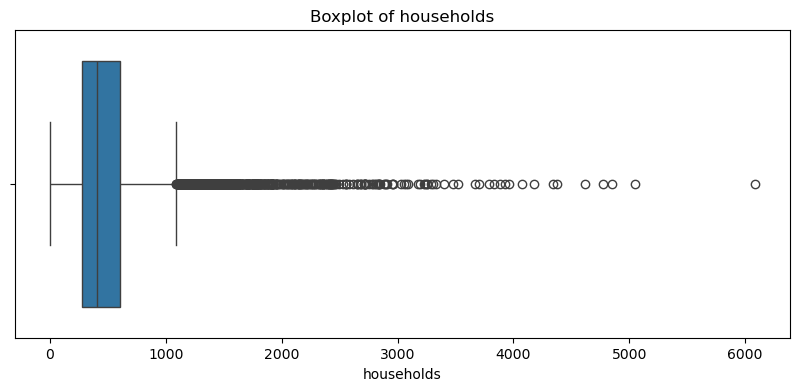

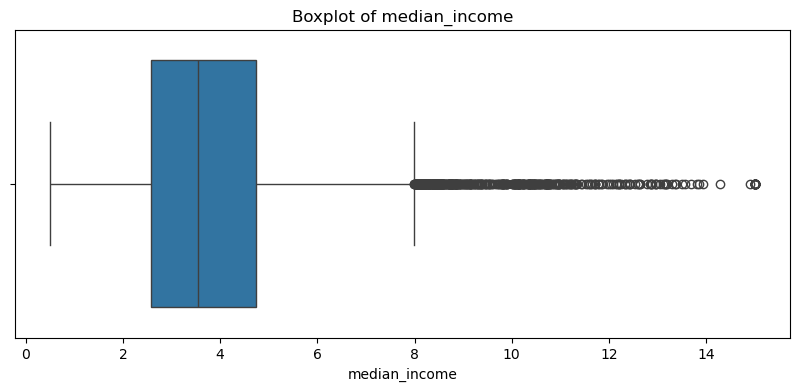

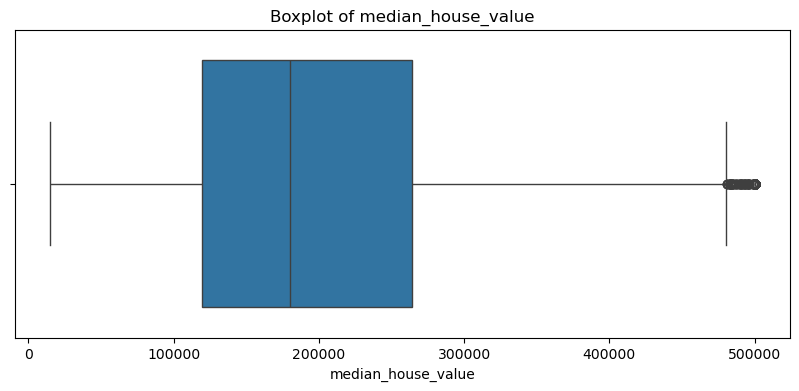

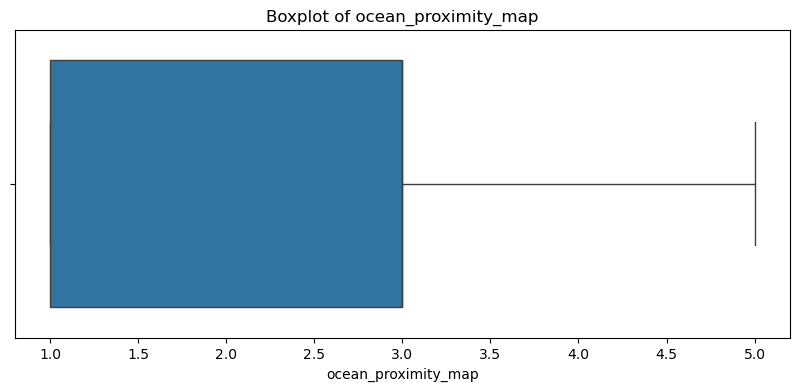

In [18]:
# Mengambil hanya kolom numerik
numerical = df.select_dtypes(include='number')

for col in numerical.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=numerical[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

Berdasarkan boxplot di atas dapat dilihat bahwa pada kolom `total_rooms`, `total_bedrooms`, `population`, `households`,`median_income` dan `median_house_value` memiliki outlier. Oleh karena itu perlu kita cek outlier pada kolom-kolom tersebut.

In [19]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')        

In [20]:
# Outliers pada fitur total_rooms
find_anomalies(df['total_rooms'])

IQR: 1697.0
limit_bawah: -1094.5
limit_atas: 5693.5


In [21]:
# Menghitung jumlah value yang nilainya berada di atas outlier pada kolom total_rooms
df[df['total_rooms']>=5693.5]['total_rooms'].value_counts()

total_rooms
7105.0     4
5805.0     3
5819.0     3
6100.0     3
5799.0     3
          ..
12259.0    1
14944.0    1
7446.0     1
7635.0     1
6531.0     1
Name: count, Length: 819, dtype: int64

In [22]:
# Outliers pada fitur total_bedrooms
find_anomalies(df['total_bedrooms'])

IQR: 349.0
limit_bawah: -227.5
limit_atas: 1168.5


In [23]:
# Menghitung jumlah value yang nilainya berada di atas outlier pada kolom total_bedrooms
df[df['total_bedrooms']>=1168.5]['total_bedrooms'].value_counts()

total_bedrooms
1281.0    7
1217.0    5
1269.0    5
1182.0    5
1603.0    5
         ..
1504.0    1
3032.0    1
4183.0    1
3280.0    1
2387.0    1
Name: count, Length: 610, dtype: int64

In [24]:
# Outliers pada fitur population
find_anomalies(df['population'])

IQR: 940.0
limit_bawah: -626.0
limit_atas: 3134.0


In [25]:
# Menghitung jumlah value yang nilainya berada di atas outlier pada kolom population
df[df['population']>=3134.0]['population'].value_counts()

population
3637.0    4
3171.0    4
3188.0    4
3148.0    3
3280.0    3
         ..
4545.0    1
3811.0    1
4952.0    1
4738.0    1
4992.0    1
Name: count, Length: 723, dtype: int64

In [26]:
# Outliers pada fitur population
find_anomalies(df['households'])

IQR: 325.0
limit_bawah: -208.5
limit_atas: 1091.5


In [27]:
# Menghitung jumlah value yang nilainya berada di atas outlier pada kolom households
df[df['households']>=1091.5]['households'].value_counts()

households
1131.0    7
1265.0    6
1115.0    5
1098.0    5
1227.0    5
         ..
1418.0    1
1538.0    1
1100.0    1
1888.0    1
2225.0    1
Name: count, Length: 574, dtype: int64

In [28]:
# Outliers pada fitur population
find_anomalies(df['median_income'])

IQR: 2.1655000000000006
limit_bawah: -0.6776500000000012
limit_atas: 7.984350000000001


In [29]:
# Menghitung jumlah value yang nilainya berada di atas outlier pada kolom median_income
df[df['median_income']>=7.984350000000001]['median_income'].value_counts()

median_income
15.0001    31
15.0000     2
8.0755      2
8.1064      2
8.5650      2
           ..
14.2867     1
10.9201     1
10.7097     1
9.8091      1
8.7939      1
Name: count, Length: 448, dtype: int64

In [30]:
# Outliers pada fitur population
find_anomalies(df['median_house_value'])

IQR: 144300.0
limit_bawah: -96850.0
limit_atas: 480350.0


In [31]:
# Menghitung jumlah value yang nilainya berada di atas outlier pada kolom median_house_value
df[df['median_house_value']>=480350.0]['median_house_value'].value_counts()

median_house_value
500001.0    678
500000.0     18
483300.0      6
485000.0      2
491200.0      2
490800.0      2
495500.0      2
480800.0      2
484600.0      2
496400.0      2
492500.0      2
488500.0      1
485300.0      1
484700.0      1
489000.0      1
493000.0      1
494700.0      1
495900.0      1
495400.0      1
487500.0      1
484100.0      1
498600.0      1
481500.0      1
493400.0      1
494400.0      1
493800.0      1
499000.0      1
487100.0      1
498700.0      1
488900.0      1
497400.0      1
483800.0      1
482900.0      1
487000.0      1
487200.0      1
495600.0      1
490000.0      1
493300.0      1
483600.0      1
490400.0      1
489800.0      1
490300.0      1
492000.0      1
481300.0      1
493200.0      1
499100.0      1
496000.0      1
482700.0      1
483700.0      1
485700.0      1
Name: count, dtype: int64

Pada kolom `median_income` dan `median_house_value` terdapat outlier dengan value yang cukup besar yaitu pada kolom `median_income` terdapat 31 data yang memiliki value sebesar 15.0001 dan pada kolom `median_house_value` terdapat 678 data yang memiliki value sebesar 500001.0. Oleh karena itu untuk value-value tersebut akan dihapus supaya tidak mempengaruhi model machine learning.

Untuk outlier pada kolom lain akan tetap dipertahankan dikarenakan jika semua outliernya dihilangkan maka dikhawatirkan bahwa model machine learning  tidak merepresentasikan data yang sebenarnya akibat banyaknya data yang dihilangkan.

In [32]:
# Memfilter data mengambil data yang median_income < 15.0001 dan median_house_value < 500001.0
df=df.loc[df['median_income']< 15.0001]
df=df.loc[df['median_house_value']< 500001.0]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,ocean_proximity_map
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0,1
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,2
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,3
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,3
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,1
...,...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0,1
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0,1
14445,-121.90,36.58,31.0,1431.0,435.0,704.0,393.0,3.1977,NEAR OCEAN,289300.0,4
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0,3


#### Check Duplicate

Pada bagian ini kita ingin mengecek apakah ada data yang duplikat jika masih ada data yang duplikat maka dapat didrop data tersebut.

In [33]:
# Menghitung jumlah data yang duplikat
count_duplikat = df.duplicated().sum()
count_duplikat

0

Data yang terdapat pada dataset California Housing Price sudah tidak ada duplikat data.

# Feature Engineering

Pada bagian ini kita akan menambah kolom dan melakukan binning untuk menambah informasi yang diharapkan mampu untuk mempertajam model regresi.

#### Menambah kolom

Pada bagian ini akan ditambahkan kolom : 
- `rooms_per_house` : jumlah kamar di setiap rumah pada setiap bloknya.
- `bedrooms_per_house` : jumlah kamar tidur di setiap rumah pada setiap bloknya.
- `population_per_house` : jumlah populasi yang dapat tinggal di setiap rumah pada setiap bloknya.

Kolom ini ditambahkan dikarenakan biasanya dalam mematok nilai jual pada properti rumah dinilai berdasarkan fasilitas berapa jumlah kamar, kamar tidur serta mampu diisi oleh berapa banyak orang.

In [34]:
df['rooms_per_house']=df['total_rooms']/df['households']
df['bedrooms_per_house']=df['total_bedrooms']/df['total_rooms']
df['population_per_house']=df['population']/df['households']
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,ocean_proximity_map,rooms_per_house,bedrooms_per_house,population_per_house
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0,1,2.800000,0.250000,4.825000
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,2,3.671480,0.322517,3.018051
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,3,6.478022,0.167939,3.810440
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,3,2.518000,0.474980,3.051000
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,1,4.622754,0.251295,3.628743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0,1,6.000000,0.174277,3.251142
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0,1,5.349282,0.174419,3.095694
14445,-121.90,36.58,31.0,1431.0,435.0,704.0,393.0,3.1977,NEAR OCEAN,289300.0,4,3.641221,0.303983,1.791349
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0,3,4.540598,0.234353,2.247863


#### Binning

Pada bagian ini kita akan melakukan binning terhadap `housing_median_age` dan `median_income`. Di mana pada kolom `housing_median_age` akan dibagi menjadi 3 kelompok yaitu New, Medium, Old dan pada kolom `median_income` juga akan dibagi menjadi 3 kelompok yaitu Low, Middle, Upper berdasarkan data pada California Housing Price.

In [35]:
df['housing_median_age_bin']=pd.qcut(df['housing_median_age'],3)
df['median_income_bin']=pd.qcut(df['median_income'],3)

In [36]:
df['housing_median_age_bin'].value_counts()

housing_median_age_bin
(21.0, 35.0]     5055
(0.999, 21.0]    4603
(35.0, 52.0]     4110
Name: count, dtype: int64

In [37]:
df['housing_median_age_group'] = np.where((df['housing_median_age'] >= 0) & (df['housing_median_age'] < 21), 'New',
                        np.where((df['housing_median_age'] >= 21) & (df['housing_median_age'] < 35), 'Medium', 'Old'))

In [38]:
df['median_income_bin'].value_counts()

median_income_bin
(4.128, 13.148]    4590
(0.499, 2.825]     4589
(2.825, 4.128]     4589
Name: count, dtype: int64

In [39]:
df['median_income_group'] = np.where((df['median_income'] >= 0) & (df['median_income'] < 3), 'Low',
                        np.where((df['median_income'] >= 3) & (df['median_income'] < 5), 'Middle', 'Upper'))

#### Limitasi Model

In [40]:
df[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']].describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,13768.000000,13768.000000,13768.000000,13768.000000,13768.000000,13768.000000,13768.000000
mean,28.358149,2622.716153,539.223199,1440.362144,501.261621,3.668885,192362.833890
std,12.503228,2188.407488,424.007600,1160.940828,385.070455,1.553178,97571.623411
min,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,18.000000,1441.000000,297.000000,793.000000,280.000000,2.531300,116700.000000
50%,28.000000,2112.000000,435.000000,1179.000000,411.000000,3.455050,174000.000000
75%,37.000000,3120.250000,646.000000,1743.000000,606.000000,4.575000,248000.000000
max,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,13.147700,500000.000000


Interpretasi dari model direkomendasikan untuk fitur-fitur di rentang nilai min dan nilai max.

# Feature Selection

Untuk feature selection yang digunakan adalah seluruh fitur terlebih dahulu kecuali `median_income`, `housing_median_age`,`ocean_proximity`,`housing_median_age_bin`, `median_income_bin` dikarenakan untuk fitur median_income telah diwakilkan oleh fitur median_income_group sedangkan untuk fitur housing_median_age diwakilkan oleh fitur housing_median_age_group dan fitur ocean_proximity diwakilkan oleh ocean_proximity_map.

Processing Scheme

1. target : median_house_value
1. OneHotEncoder : housing_median_age_group, median_income_group
1. RobustScaler : longitude, latitude, total_rooms, total_bedrooms, population, households, ocean_proximity_map, rooms_per_house,bedrooms_per_house, population_per_house

In [41]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value', 'ocean_proximity_map',
       'rooms_per_house', 'bedrooms_per_house', 'population_per_house',
       'housing_median_age_bin', 'median_income_bin',
       'housing_median_age_group', 'median_income_group'],
      dtype='object')

#### Encoding I

Sebelum melakukan modelling maka kita perlu untuk mengubah fitur kategorikal menjadi numerikal di mana pada fitur kategorikal pada data California Housing Price ini saya mengubahnya menggunakan One Hot Encoder. Untuk fitur-fitur lainnya yang sudah numerikal saya melakukan scaling dengan menggunakan robust scaler dikarenakan fitur-fitur tersebut memiliki distribusi data yang tidak terdistribusi normal.

In [42]:
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first', handle_unknown='ignore'), ['housing_median_age_group', 'median_income_group']),
    ('robust_scaler', RobustScaler(), ['longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'ocean_proximity_map', 'rooms_per_house',
       'bedrooms_per_house', 'population_per_house'])
], remainder='passthrough')

#### Data Splitting I

Kemudian data dilakukan split menjadi X yang merupakan independent variable dan y yang merupakan dependent variable.

In [43]:
X = df.drop(['median_house_value','median_income', 'housing_median_age','ocean_proximity','housing_median_age_bin', 'median_income_bin'], axis=1)
y = df['median_house_value']


#### Train and Test Splitting I

Kemudian data X dan y tersebut dibagi menjadi data train dan data test dengan perbandingan train : test sebesar 70:30.

In [44]:
from sklearn.model_selection import train_test_split
## split data?
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=2020)


Untuk fitur lainnya akan dicek multicolinearitynya terlebih dahulu di mana multicolinearity merupakan kondisi di mana dua atau lebih variabel independen dalam model yang saling berkorelasi secara signifikan sehingga jika ada fitur yang saling berkorelasi secara signifikan maka akan di drop.

#### Multicolinearity

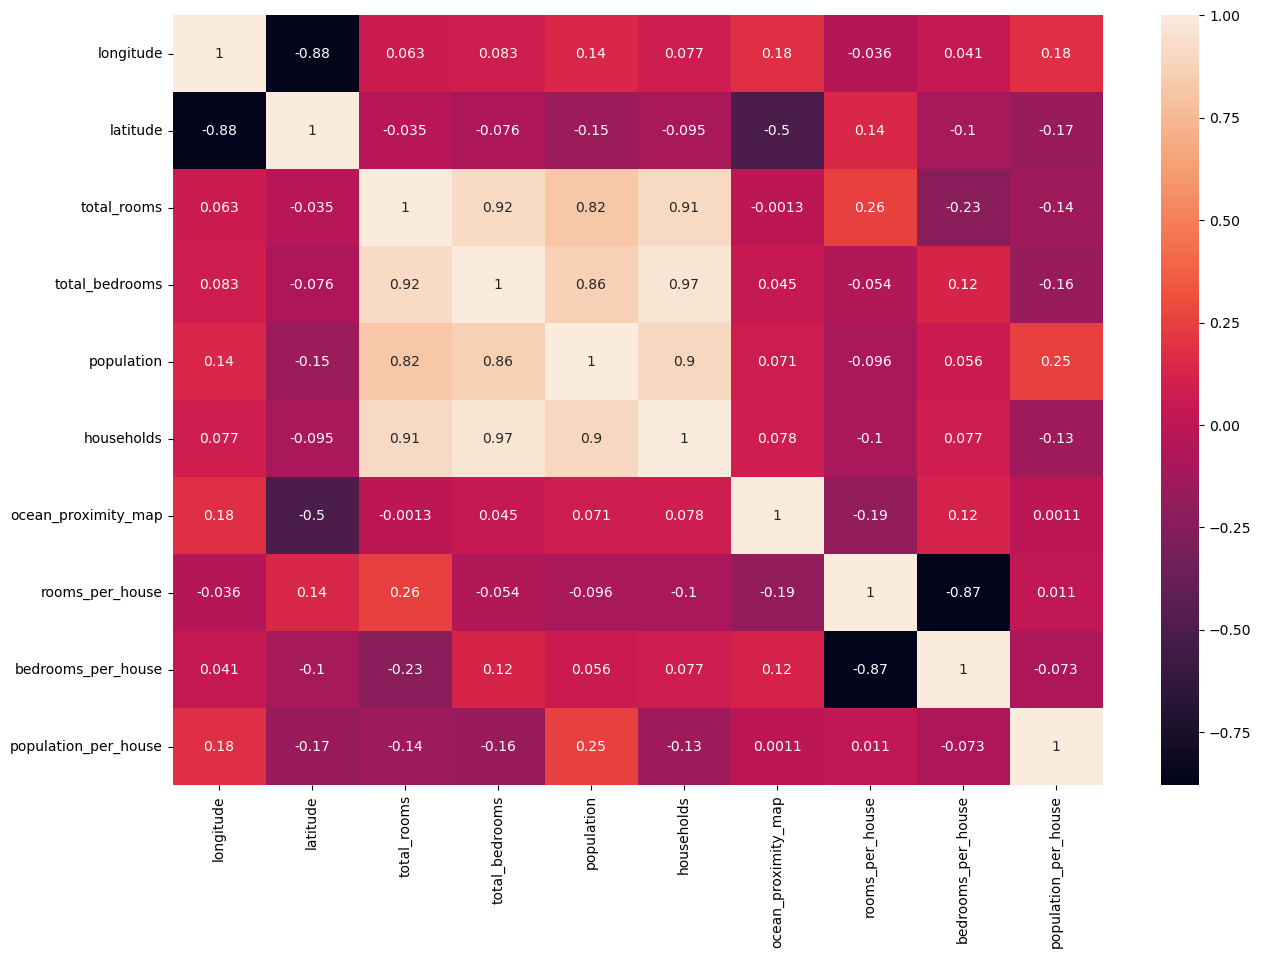

In [45]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.select_dtypes(include='number').corr(method='spearman'),annot=True)
plt.show()

In [46]:
dfcorr=X_train.select_dtypes(include='number')
corrMatrix=dfcorr.corr(method='spearman')
already_in = set()
result = []
for col in corrMatrix:
    large_corr = corrMatrix[col][corrMatrix[col] >= 0.7 ].index.tolist()
    if large_corr and col not in already_in:
        already_in.update(set(large_corr))
        large_corr.append(col)
        result.append(large_corr)

result

[['longitude', 'longitude'],
 ['latitude', 'latitude'],
 ['total_rooms', 'total_bedrooms', 'population', 'households', 'total_rooms'],
 ['ocean_proximity_map', 'ocean_proximity_map'],
 ['rooms_per_house', 'rooms_per_house'],
 ['bedrooms_per_house', 'bedrooms_per_house'],
 ['population_per_house', 'population_per_house']]

In [47]:
list(pd.DataFrame(result)[2].unique())+list(pd.DataFrame(result)[3].unique())+list(pd.DataFrame(result)[4].unique())

[None, 'population', None, 'households', None, 'total_rooms']

Jika dilihat dari grafik heatmap maka terdapat beberapa fitur di mana multicolinearitynya besar seperti fitur `population`, `households` dan `total_rooms`. Oleh karena itu ketiga fitur tersebut akan didrop untuk menghindari model yang overfit sehinggga dengan melakukan drop pada fitur-fitur tersebut diharapkan dapat meningkatkan kemampuan prediksi data baru dengan lebih akurat.

#### Encoding II

In [48]:
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first', handle_unknown='ignore'), ['housing_median_age_group', 'median_income_group']),
    ('robust_scaler', RobustScaler(), ['longitude', 'latitude', 'total_bedrooms',
    'ocean_proximity_map', 'rooms_per_house',
       'bedrooms_per_house', 'population_per_house'])
], remainder='passthrough')

#### Data Splitting II

In [49]:
X = df.drop(['median_house_value','median_income', 'housing_median_age','ocean_proximity','housing_median_age_bin', 'median_income_bin','population','households','total_rooms'], axis=1)
y = df['median_house_value']


#### Train and Test Splitting II

In [50]:
from sklearn.model_selection import train_test_split
## split data?
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=2020)


# Modeling

#### Choose a Benchmark Model

Kemudian kita akan mencari model terbaik yang dapat memprediksi harga rumah di California dengan error yang kecil dengan melakukan benchmark model seperti berikut.

In [51]:
# Identify categorical and numerical columns
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=[np.number]).columns

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define models
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Define TransformedTargetRegressor models with log transformation
log_lr = TransformedTargetRegressor(regressor=lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(regressor=knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(regressor=dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(regressor=rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(regressor=xgb, func=np.log, inverse_func=np.exp)

# Candidate models
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

# Store results
score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Evaluate models
for model in models:
    estimator = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X, 
        y, 
        cv=kf, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
    )
    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(-model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())
    
    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X, 
        y, 
        cv=kf, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
    )
    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(-model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())
    
    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X, 
        y, 
        cv=kf, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
    )
    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(-model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())
    
    print(f'Model: {model.regressor.__class__.__name__}, RMSE: {model_cv_rmse}, MAE: {model_cv_mae}, MAPE: {model_cv_mape}')

# Results summary
for idx, model in enumerate(models):
    print(f'Model: {model.regressor.__class__.__name__}')
    print(f'  Mean RMSE: {nilai_mean_rmse[idx]:.4f}, Std RMSE: {nilai_std_rmse[idx]:.4f}')
    print(f'  Mean MAE: {nilai_mean_mae[idx]:.4f}, Std MAE: {nilai_std_mae[idx]:.4f}')
    print(f'  Mean MAPE: {nilai_mean_mape[idx]:.4f}, Std MAPE: {nilai_std_mape[idx]:.4f}')

Model: LinearRegression, RMSE: [-69678.58936156 -73689.08683526 -67315.31112306 -66376.27234858
 -68996.59669346], MAE: [-49968.52156422 -50108.93442392 -48401.75634212 -48457.14512109
 -49636.36681075], MAPE: [-0.28234677 -0.2885048  -0.27531201 -0.28108178 -0.27617997]
Model: KNeighborsRegressor, RMSE: [-62067.91905466 -60328.94621997 -59615.38871288 -58821.51962025
 -61361.52901474], MAE: [-42760.36725102 -41710.14264794 -41033.30751994 -41307.72917164
 -42590.2039103 ], MAPE: [-0.23378877 -0.22751607 -0.22067427 -0.23135516 -0.23143028]
Model: DecisionTreeRegressor, RMSE: [-63630.55999052 -64344.86343616 -61843.09212376 -62615.87764254
 -63216.05929607], MAE: [-41421.09803922 -41670.84277415 -40693.57334786 -41182.23755903
 -42189.61205957], MAPE: [-0.22845982 -0.24242849 -0.22783294 -0.23264283 -0.23278812]
Model: RandomForestRegressor, RMSE: [-47540.41100702 -47568.53211206 -46439.93085511 -45548.11204428
 -47055.2243237 ], MAE: [-30545.75969858 -30746.73210667 -29978.06216893 -2

In [52]:
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,69211.171272,2527.733662,49314.544852,739.002959,0.280685,0.004759
1,KNN Regressor,60439.060525,1167.144140,41880.350100,685.954671,0.228953,0.004602
2,DecisionTree Regressor,63130.090498,854.905061,41431.472756,497.753868,0.232830,0.005220
3,RandomForest Regressor,46830.442068,761.082015,30322.087799,402.188509,0.165441,0.003341
4,XGBoost Regressor,44545.999343,626.294395,29164.658513,372.576850,0.160024,0.003494


Jika dilihat dari hasil yang didapatkan terlihat bahwa model yang memiliki nilai error terkecil yaitu menggunakan model XGBoost Regressor dan RandomForest Regressor. Oleh karena itu kedua model tersebut akan dicoba untuk memprediksi data test dan dibandingkan untuk memilih yang terbaik.

#### Predict to Test Set with the Benchmark Model

In [53]:
# Benchmark 2 model terbaik
benchmark_models = {
    'XGBoost': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

# Store results
score_rmse_benchmark = []
score_mae_benchmark = []
score_mape_benchmark = []

# Prediksi pada test set
for name, model in benchmark_models.items():
    estimator = Pipeline([
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(regressor=model, func=np.log, inverse_func=np.exp))
    ])
    
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    
    score_rmse_benchmark.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae_benchmark.append(mean_absolute_error(y_test, y_pred))
    score_mape_benchmark.append(mean_absolute_percentage_error(y_test, y_pred))

# Create DataFrame for benchmark results
score_before_tuning = pd.DataFrame({
    'RMSE': score_rmse_benchmark,
    'MAE': score_mae_benchmark,
    'MAPE': score_mape_benchmark
}, index=benchmark_models.keys())

score_before_tuning

,RMSE,MAE,MAPE
XGBoost,46227.735992,29995.253498,0.165876
RandomForest,47906.286169,31085.628952,0.171619


Jika dilihat dari hasil prediksi ke data test terlihat bahwa model XGBoost memiliki error yang lebih kecil dibandingkan dengan model RandomForest. Selanjutnya akan dicoba apabila kedua model tersebut dilakukan hyperparameter tuning dan kemudian akan dibandingkan dengan hasil sebelum dilakukan hyperparameter tuning.

#### Hyperparameter Tuning

- Hyperparameter Tuning Model XGBoost

In [54]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [55]:
# Definisikan scaler
scaler = StandardScaler()

# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [56]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['housing_median_age_group',
                                                                                'median_income_group']),
                                                                              ('robust_scaler',
                                                                               RobustScaler(),
                                                                               ['longitude',
                                                                                'latitude',
                                                                                'total_bedr...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [57]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,1.457912,0.109733,0.033300,0.003811,0.9,0.059948,119,8,0.05,5,...,465.011215,1,-0.169197,-0.179765,-0.176211,-0.177471,-0.176011,-0.175731,0.003530,1
3,1.032438,0.023411,0.042486,0.002327,0.5,0.021544,166,8,0.1,9,...,313.981389,4,-0.182048,-0.196962,-0.188273,-0.196724,-0.198364,-0.192474,0.006313,4
20,0.456350,0.019765,0.027575,0.011012,0.9,0.007743,143,4,0.38,6,...,449.900000,2,-0.180728,-0.194489,-0.189296,-0.187526,-0.188098,-0.188027,0.004402,2
8,0.829953,0.053970,0.027791,0.002850,0.7,0.021544,182,6,0.31,2,...,376.340255,3,-0.186224,-0.192617,-0.185178,-0.192645,-0.193947,-0.190122,0.003657,3
17,0.740560,0.016057,0.028868,0.006598,0.6,0.001,190,5,0.04,9,...,497.059941,5,-0.187427,-0.196098,-0.193179,-0.194165,-0.193981,-0.192970,0.002933,5


In [58]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -44466.59993484454
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 119, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 5, 'model__colsample_bytree': 0.8}


- Hyperparameter Tuning Model RandomForest

In [59]:
# Hyperparam Space Random Forest

# Jumlah pohon pada random forest
n_estimators = list(np.arange(100, 201))

# Jumlah fitur yang perlu dipertimbangkan di setiap split
max_features = list(np.arange(2, 11))

# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Jumlah minimum sampel yang diperlukan untuk split sebuah node
min_samples_split = list(np.arange(2, 21))

# Jumlah minimum sampel yang diperlukan pada setiap leaf
min_samples_leaf = list(np.arange(1, 21))


hyperparam_space_rf = {
    'model__n_estimators': n_estimators,
    'model__max_features': max_features,
    'model__max_depth': max_depth,
    'model__min_samples_split': min_samples_split,
    'model__min_samples_leaf': min_samples_leaf,
}

In [60]:
# Model 3 dengan hyperparameter tuning
rf = RandomForestRegressor(random_state=0)

# Membuat algorithm chains
estimator_rf = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', rf)
])

crossval = KFold(n_splits=5, shuffle=True, random_state=0)

# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    estimator_rf,
    param_distributions = hyperparam_space_rf,
    n_iter = 100,
    cv = crossval,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # hanya bisa memilih satu metrik untuk optimisasi
    random_state = 1
)

In [61]:
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['housing_median_age_group',
                                                                                'median_income_group']),
                                                                              ('robust_scaler',
                                                                               RobustScaler(),
                                                                               ['longitude',
                                                                                'latitude',
                                                                                'total_bedr...
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6, 7, 8, 9,
                                                                     10, 11, 12,
                                                                     13, 14, 15,
                                                                     16, 17, 18,
                                                                     19, 20],
                                        'model__n_estimators': [100, 101, 102,
                                                                103, 104, 105,
                                                                106, 107, 108,
                                                                109, 110, 111,
                                                                112, 113, 114,
                                                                115, 116, 117,
                                                                118, 119, 120,
                                                                121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129, ...]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [62]:
# Cek skor dan params terbaik
print('RandomForest')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

RandomForest
Best_score: -50228.44772535462
Best_params: {'model__n_estimators': 102, 'model__min_samples_split': 10, 'model__min_samples_leaf': 7, 'model__max_features': 6, 'model__max_depth': 10}


#### Predict to Test Set with the Tuned Model

Setelah dilakukan hyperparameter tuning untuk model XGBoost dan RandomForest maka diperlukan untuk dicoba prediksi ke dataset untuk mengetahui apakah hasilnya lebih baik jika dibandingkan dengan model yang tanpa dilakukan hyperparameter tuning.

In [63]:
# Model XGBoost
model = {'XGBoost': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning_xgb = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning_xgb

,RMSE,MAE,MAPE
XGBoost,45633.351604,30577.726484,0.178978


In [64]:
# Model RandomForest Regressor
model = {'RF': RandomForestRegressor(random_state=1)}

# Define model terhadap estimator terbaik
rf_tuning = random_rf.best_estimator_

# Fitting model
rf_tuning.fit(X_train, y_train)

# Predict test set
y_pred_rf_tuning = rf_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)

score_after_tuning_rf = pd.DataFrame({'RMSE': rmse_rf_tuning, 'MAE': mae_rf_tuning, 'MAPE': mape_rf_tuning}, index=model.keys())
score_after_tuning_rf

,RMSE,MAE,MAPE
RF,50745.506283,35000.561595,0.204404


#### Performance Comparison

Setelah didapatkan hasil dari model sebelum dan sesudah dilakukan hyperparameter tuning maka kita akan coba untuk bandingkan dan memilih model yang terbaik yang memiliki nilai error paling kecil.

In [65]:
# Sebelum hyperparameter tuning
display(pd.DataFrame(score_before_tuning.loc['XGBoost']).T, pd.DataFrame(score_before_tuning.loc['RandomForest']).T)

,RMSE,MAE,MAPE
XGBoost,46227.735992,29995.253498,0.165876


,RMSE,MAE,MAPE
RandomForest,47906.286169,31085.628952,0.171619


In [66]:
# Setelah hyperparameter tuning
display(score_after_tuning_xgb, score_after_tuning_rf)

,RMSE,MAE,MAPE
XGBoost,45633.351604,30577.726484,0.178978


,RMSE,MAE,MAPE
RF,50745.506283,35000.561595,0.204404


Jika dilihat dari hasil yang didapatkan terlihat bahwa model sebelum dilakukan hyperparameter tuning menunjukkan nilai error yang lebih kecil jika dibandingkan dengan model setelah dilakukan hyperparameter tuning dan model XGBoost sebelum dilakukan hyperparameter tuning yang menjadi model terbaik dengan memiliki nilai error yang paling kecil ketika dicoba untuk memprediksi data test. Oleh karena itu kita akan memilih model XGBoost sebelum parameter tuning untuk machine learning ini.

Cara kerja XGBoost dengan cara menggabungkan beberapa model machine learning yang lemah menjadi satu model yang kuat. Proses ini dilakukan dengan cara mengurangi error dari setiap model yang dibangun, dengan cara menambahkan model baru yang dapat meminimalkan error yang ada. Proses ini dilakukan secara iteratif, sehingga setiap kali iterasi, performa model semakin meningkat.

XGBoost didasarkan pada kerangka boosting gradien. Boosting gradien membangun model secara berurutan, di mana setiap model baru berusaha memperbaiki kesalahan model sebelumnya. Ide utamanya adalah menggabungkan kekuatan banyak model sederhana (biasanya decision tree) untuk menghasilkan ensemble yang kuat.

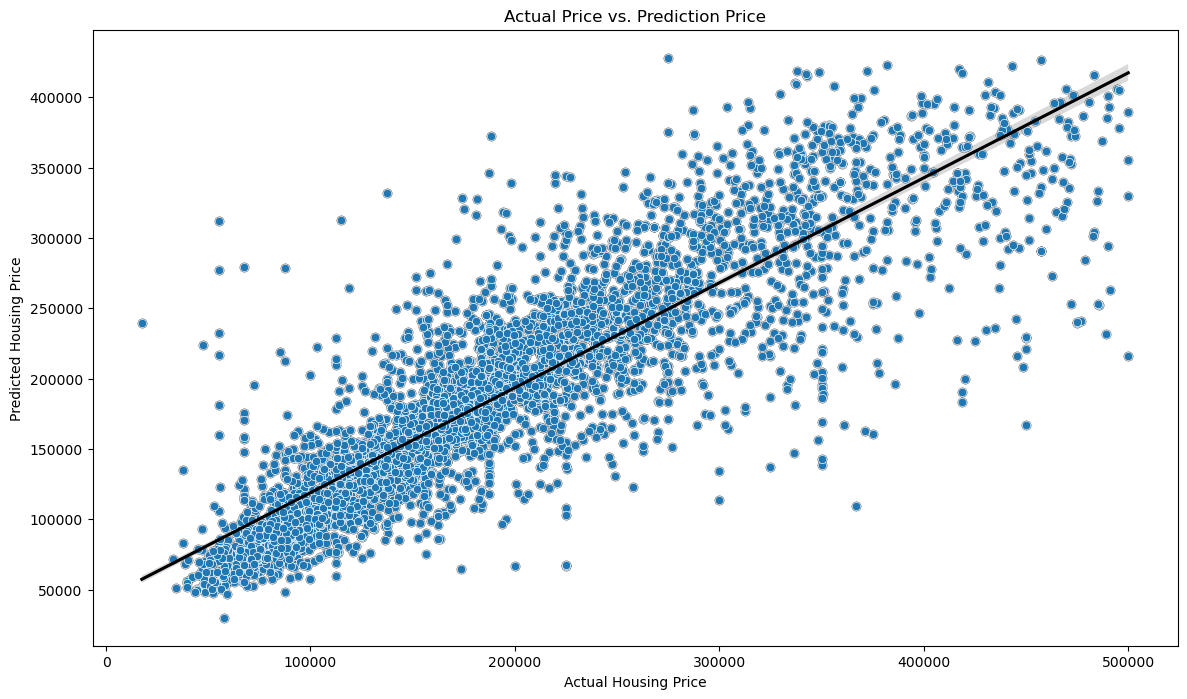

In [67]:
plt.figure(figsize=(14, 8))
sns.regplot(x=y_test,y=y_pred,color='black')
plot = sns.scatterplot(x=y_test, y=y_pred).set(title='Actual Price vs. Prediction Price', 
                                               xlabel='Actual Housing Price', 
                                               ylabel='Predicted Housing Price');

Grafik di atas memperlihatkan bahwa perbandingan nilai harga aktual dengan harga prediksi membentuk suatu pola yang linear di mana sudah cukup baik dikarenakan mendekati garis regresi walaupun masih banyak data juga yang tersebar sehingga tidak mendekati garis regresi.

# Feature Importances

Best parameters found:  {'regressor__subsample': 0.9, 'regressor__n_estimators': 200, 'regressor__max_depth': 7, 'regressor__learning_rate': 0.1, 'regressor__colsample_bytree': 0.9}


<Axes: title={'center': 'Feature Importances'}>

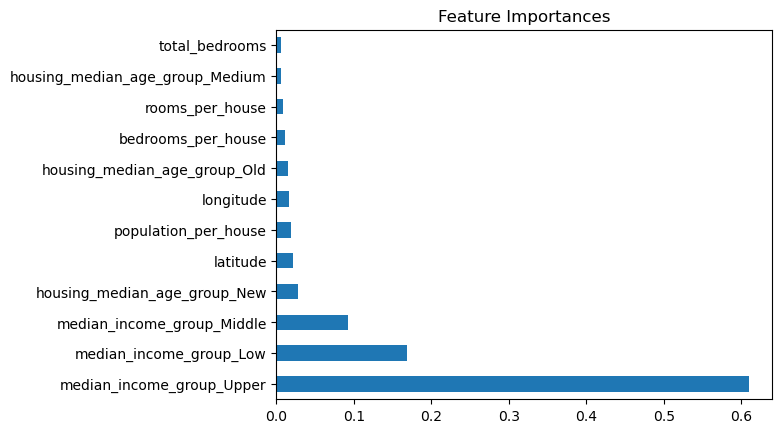

In [68]:
# Identifikasi kolom numerik dan kategorikal
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Preprocessing untuk kolom numerik dan kategorikal
numerical_transformer = 'passthrough'
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Buat preprocessor menggunakan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Buat pipeline yang menyertakan preprocessor dan model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])

# Set parameter untuk RandomizedSearchCV
param_dist = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__max_depth': [3, 5, 7],
    'regressor__subsample': [0.7, 0.8, 0.9],
    'regressor__colsample_bytree': [0.7, 0.8, 0.9]
}

random_xgb = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=3, random_state=2020)

# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

# Cetak parameter terbaik
print("Best parameters found: ", random_xgb.best_params_)

# Ekstrak model terbaik
best_model = random_xgb.best_estimator_.named_steps['regressor']

# Dapatkan nama fitur dari preprocessor
categorical_feature_names = random_xgb.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
feature_names = np.hstack([numerical_cols, categorical_feature_names])

# Dapatkan importansi fitur dari model XGBoost
feature_importances = best_model.feature_importances_

# Buat Series untuk importansi fitur dan plot
feature_imp = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)
feature_imp.plot(kind='barh', title='Feature Importances')

Pada grafik di atas terlihat bahwa fitur yang sangat mempengaruhi median price value yaitu fitur median income dan yang paling kecil pengaruhnya adalah fitur total bedrooms.

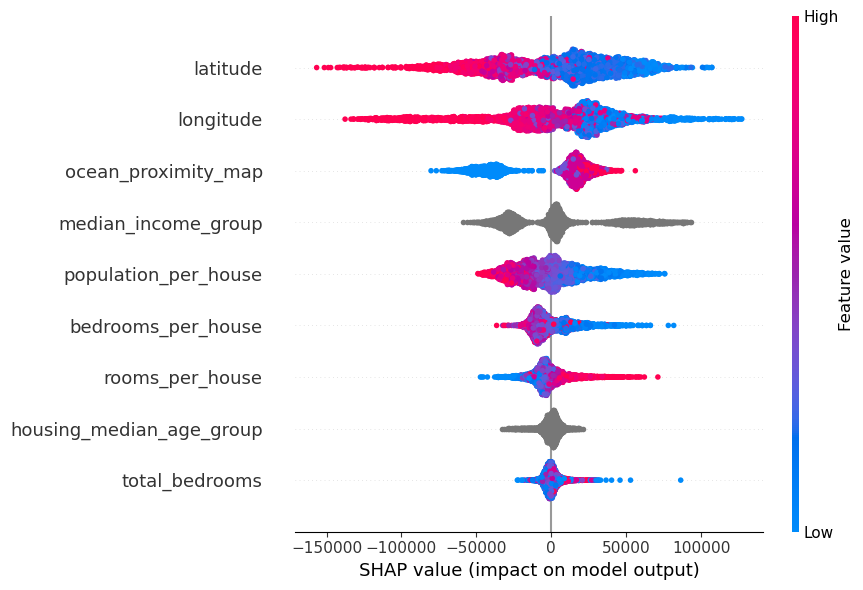

In [69]:
import shap

# Konversi kolom object menjadi kategori
X_train = X_train.copy()
X_test = X_test.copy()

for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

# Buat dan fit model XGBRegressor dengan enable_categorical=True
xgb_model = XGBRegressor(enable_categorical=True)
xgb_model.fit(X_train, y_train)

# Prediksi
y_pred = xgb_model.predict(X_test)

# Gunakan SHAP untuk interpretasi
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

# Buat plot ringkasan SHAP
shap.summary_plot(shap_values, X_test, plot_size=(9, 6))

Dari grafik SHAP di atas jika memiliki warna merah maka menandakan nilai fitur yang tinggi sedangkan apabila berwarna biru maka menandakan nilai fitur yang rendah sehingga dapat disimpulkan bahwa: 
- fitur latitude dan longitude menunjukkan memiliki pengaruh yang besar terhadap prediksi harga rumah di California.
- fitur ocean_proximity_map menunjukkan nilai SHAP yang positif memiliki nilai fitur yang tinggi dan yang negatif memiliki nilai fitur yang rendah menunjukkan bahwa kedekatan dengan laut meningkatkan harga rumah di California.
- median_income_group dan housing_median_age_group berwarna abu-abu berwarna abu-abu yang menandakan fitur ini tidak memiliki variasi yang besar dan dampaknya terhadap prediksi model bisa dikatakan tidak terlalu berpengaruh.

# Rule Based

Berikut ini merupakan prediksi apabila tidak menggunakan alat prediktif melainkan dengan menggunakan nilai meannya kemudian nanti akan kita bandingkan dengan hasil dari menggunakan alat prediktif dan kita akan bandingkan yang mana yang lebih baik digunakan dengan membandingkan nilai errornya.

In [70]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,ocean_proximity_map,rooms_per_house,bedrooms_per_house,population_per_house,housing_median_age_bin,median_income_bin,housing_median_age_group,median_income_group
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0,1,2.800000,0.250000,4.825000,"(35.0, 52.0]","(0.499, 2.825]",Old,Low
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,2,3.671480,0.322517,3.018051,"(35.0, 52.0]","(0.499, 2.825]",Old,Low
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,3,6.478022,0.167939,3.810440,"(0.999, 21.0]","(4.128, 13.148]",New,Upper
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,3,2.518000,0.474980,3.051000,"(0.999, 21.0]","(0.499, 2.825]",New,Low
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,1,4.622754,0.251295,3.628743,"(35.0, 52.0]","(0.499, 2.825]",Old,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0,1,6.000000,0.174277,3.251142,"(0.999, 21.0]","(4.128, 13.148]",New,Middle
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0,1,5.349282,0.174419,3.095694,"(21.0, 35.0]","(2.825, 4.128]",Medium,Low
14445,-121.90,36.58,31.0,1431.0,435.0,704.0,393.0,3.1977,NEAR OCEAN,289300.0,4,3.641221,0.303983,1.791349,"(21.0, 35.0]","(2.825, 4.128]",Medium,Middle
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0,3,4.540598,0.234353,2.247863,"(21.0, 35.0]","(4.128, 13.148]",Medium,Upper


In [71]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value', 'ocean_proximity_map',
       'rooms_per_house', 'bedrooms_per_house', 'population_per_house',
       'housing_median_age_bin', 'median_income_bin',
       'housing_median_age_group', 'median_income_group'],
      dtype='object')

In [72]:
df['total_rooms_bin']=pd.qcut(df['total_rooms'],3,labels=['Less', 'Enough', 'Lots'])
df['total_bedrooms_bin']=pd.qcut(df['total_bedrooms'],3,labels=['Less', 'Enough', 'Lots'])
df['population_bin']=pd.qcut(df['population'],3,labels=['Quiet', 'Normal', 'Crowded'])
df['households_bin']=pd.qcut(df['households'],3,labels=['Quiet', 'Normal', 'Crowded'])
df['rooms_per_house_bin']=pd.qcut(df['rooms_per_house'],2,labels=['Less',  'Lots'])
df['bedrooms_per_house_bin']=pd.qcut(df['bedrooms_per_house'],2,labels=['Less',  'Lots'])
df['population_per_house_bin']=pd.qcut(df['population_per_house'],2,labels=['Less',  'Lots'])

df1=df.groupby(['housing_median_age_bin','median_income_bin','total_rooms_bin','total_bedrooms_bin','population_bin','households_bin','rooms_per_house_bin','bedrooms_per_house_bin','population_per_house_bin'])['median_house_value'].mean().reset_index()
df1.columns=['housing_median_age_bin','median_income_bin','total_rooms_bin','total_bedrooms_bin','population_bin','households_bin','rooms_per_house_bin','bedrooms_per_house_bin','population_per_house_bin','flag_price']
df1

C:\Users\user\AppData\Local\Temp\ipykernel_17088\4171463779.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1=df.groupby(['housing_median_age_bin','median_income_bin','total_rooms_bin','total_bedrooms_bin','population_bin','households_bin','rooms_per_house_bin','bedrooms_per_house_bin','population_per_house_bin'])['median_house_value'].mean().reset_index()


,housing_median_age_bin,median_income_bin,total_rooms_bin,total_bedrooms_bin,population_bin,households_bin,rooms_per_house_bin,bedrooms_per_house_bin,population_per_house_bin,flag_price
0,"(0.999, 21.0]","(0.499, 2.825]",Less,Less,Quiet,Quiet,Less,Less,Less,102516.666667
1,"(0.999, 21.0]","(0.499, 2.825]",Less,Less,Quiet,Quiet,Less,Less,Lots,127080.000000
2,"(0.999, 21.0]","(0.499, 2.825]",Less,Less,Quiet,Quiet,Less,Lots,Less,132671.212121
3,"(0.999, 21.0]","(0.499, 2.825]",Less,Less,Quiet,Quiet,Less,Lots,Lots,115963.140351
4,"(0.999, 21.0]","(0.499, 2.825]",Less,Less,Quiet,Quiet,Lots,Less,Less,144588.461538
...,...,...,...,...,...,...,...,...,...,...
5827,"(35.0, 52.0]","(4.128, 13.148]",Lots,Lots,Crowded,Crowded,Less,Lots,Lots,NaN
5828,"(35.0, 52.0]","(4.128, 13.148]",Lots,Lots,Crowded,Crowded,Lots,Less,Less,327290.909091
5829,"(35.0, 52.0]","(4.128, 13.148]",Lots,Lots,Crowded,Crowded,Lots,Less,Lots,277111.111111
5830,"(35.0, 52.0]","(4.128, 13.148]",Lots,Lots,Crowded,Crowded,Lots,Lots,Less,NaN


In [73]:
df2=pd.merge(df,df1, how='left',on=['housing_median_age_bin','median_income_bin','total_rooms_bin','total_bedrooms_bin','population_bin','households_bin','rooms_per_house_bin','bedrooms_per_house_bin','population_per_house_bin'])
df2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,...,housing_median_age_group,median_income_group,total_rooms_bin,total_bedrooms_bin,population_bin,households_bin,rooms_per_house_bin,bedrooms_per_house_bin,population_per_house_bin,flag_price
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0,...,Old,Low,Less,Less,Quiet,Quiet,Less,Lots,Lots,111568.325792
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,...,Old,Low,Less,Less,Quiet,Quiet,Less,Lots,Lots,111568.325792
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,...,New,Upper,Enough,Enough,Normal,Normal,Lots,Less,Lots,214775.961538
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,...,New,Low,Enough,Lots,Crowded,Crowded,Less,Lots,Lots,133724.444444
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,...,Old,Low,Less,Less,Quiet,Quiet,Less,Lots,Lots,111568.325792


# Splitting Data II

In [74]:
df2.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value', 'ocean_proximity_map',
       'rooms_per_house', 'bedrooms_per_house', 'population_per_house',
       'housing_median_age_bin', 'median_income_bin',
       'housing_median_age_group', 'median_income_group', 'total_rooms_bin',
       'total_bedrooms_bin', 'population_bin', 'households_bin',
       'rooms_per_house_bin', 'bedrooms_per_house_bin',
       'population_per_house_bin', 'flag_price'],
      dtype='object')

In [75]:
#feature
X2=df2[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_house', 'bedrooms_per_house', 'population_per_house',
       'flag_price']]

y2=df2['median_house_value']
X_train2, X_test2, y_train2, y_test2=train_test_split(X2,y2,test_size=0.3,random_state=2020)


In [76]:
y_pred2=X_test2['flag_price']

In [77]:
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)

In [78]:
mape = mean_absolute_percentage_error(y_test2, y_pred2)

In [79]:
print('RMSE:', rmse)
print('MAE',mean_absolute_error(y_test2, y_pred2))
print('MAPE:', mape)

RMSE: 70047.70170479662
MAE 52494.384681045674
MAPE: 0.3308608264220041


Dapat dilihat bahwa MAE ketika tanpa menggunakan machine learning sebesar 52494.38 sedangkan jika menggunakan machine learning untuk prediktif harga rumah di California memiliki MAE sebesar 29834.33 sehingga dapat dikatakan bahwa dengan menggunakan machine learning yang telah kita rancang dapat memberikan prediksi harga yang lebih akurat dan efisien sebesar 43.18%.

# Conclusion

1. Berdasarkan modelling yang telah dilakukan dan analisa featuring importance dengan 2 metode yang berbeda yaitu XGBoost dan SHAP menghasilkan 2 hasil yang berbeda juga di mana dapat disimpulkan jika menggunakan XGBoost maka feature importancenya yang paling besar adalah median income sedangkan jika menggunakan SHAP didapatkan fitur latitude dan longitude. Hal ini dikarenakan:
- Feature importance dari XGBoost untuk gambaran global tentang fitur mana yang paling sering digunakan dan memberikan informasi paling banyak.
- Feature importance dari SHAP values untuk memahami kontribusi spesifik fitur terhadap prediksi individual dan untuk analisis yang lebih mendalam serta adil tentang kontribusi fitur.

2. Metrik evaluasi yang digunakan MSE, MAE dan RMSE. Model terbaik yang dapat dihasilkan adalah model XGBoost Regression tanpa dilakukan hyperparameter tuning dengan RMSE sebesar 45695.001622, MAE sebesar 29834.33225 dan MAPE sebesar 0.167691. Artinya prediksi harga yang dilakukan model memiliki rata-rata errornya sebesar 16,77% dari harga seharusnya.

3. Jika dibandingkan antara alat prediktif tanpa machine learning (menggunakan mean price) dengan menggunakan machine learning maka prediksi dengan menggunakan alat machine learning yang telah dirancang dapat memberikan prediksi harga yang lebih akurat sebesar 43.18%.

# Recommendation

#### Recommendation Model

1. Mengupdate dataset pada tahun 2024 sehingga nantinya dapat digunakan untuk memprediksi harga rumah sesuai dengan tren harga tahun saat ini.
2. Penarikan data yang dilakukan oleh sensus dapat menambahkan fitur-fitur yang memiliki pengaruh yang kuat terhadap harga rumah seperti luas rumah per rumah, lokasi perumahan apakah berada di jalan utama / perkomplekan dan apakah letak rumahnya berada di dekat fasilitas umum seperti jalan tol, transportasi umum, tempat rekreasi, sekolah dikarenakan semua itu mempengaruhi harga rumah.
3. Dapat mencoba untuk menciptakan fitur-fitur baru yang dapat dibuat berdasarkan data yang telah ada yang memiliki pengaruh lebih besar terhadap prediksi nilai harga rumah di California selain dari fitur baru (population per house, bedroom per house, rooms per house) yang sudah dibuat pada machine learning ini.
4. Dapat menggunakan modeling lain yang belum dicoba seperti deep learning

#### Recommendation Business

1. Median income menjadi fitur yang sangat berpengaruh terhadap harga rumah. Oleh karena itu kelompok dengan pendapatan yang tinggi dapat difokuskan dengan menawarkan promosi-promosi seperti down payment yang lebih rendah dikarenakan kelompok dengan pendapatan yang tinggi lebih memungkinkan untuk menjadi pembeli potensial.
2. Untuk pengelompokan umur rumah yang sudah Old dapat ditawarkan program renovasi untuk meningkatkan fasilitasnya sehingga dapat menarik pembeli potensial.

# Save Model

In [80]:
# # Save model
# import pickle

# estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
# estimator.fit(X, y)

# pickle.dump(estimator, open('California Housing Price Predict.sav', 'wb'))

In [81]:
# # Load model
# filename = 'California Housing Price Predict.sav'
# loaded_model = pickle.load(open(filename, 'rb'))

In [82]:
# np.sqrt(mean_squared_error(y, loaded_model.predict(X)))